# Red de hamming

Esta red neuronal artificial fue diseñada explícitamente para resolver probleams de clasificación binaria.

La ecuación de la capa feedforward es:
$$
a^1 = f(W^1p + b^1)
$$

donde $f$ es la función de activación, $W^1$ es la matriz de pesos, $p$ es el vector de entrada y $b^1$ es el vector de bias.

Para la capa recurrente, la ecuación es:
$$
a(0) = a^1 \\
a^2(t+1) = f(W^2a^2(t))
$$



In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class Hamming_network:
    def __init__(self) -> None:
        self._an = []
        self._S = 0
        self._R = 0

    def poslin(self, x):
        n = len(x)
        y = np.zeros(n)

        for i in range(n):
            if x[i] > 0:
                y[i] = x[i]

        return y
    
    def matmul(self, W, p):
        a = np.zeros(self._S)

        for i in range(len(a)):
            for j in range(len(p)):
                a[i] += W[i][j] * p[j]

        return a

    def train(self, W, p, itmax=500, eps=0.01):
        """
        W: weight matrix
        p: p to test
        itmax: max iteration
        eps: epsilon as initial parameter
        """
        self._R = len(p)
        self._S = len(W)

        # Wp
        a = self.matmul(W, p)

        # a^1 = Wp + b
        an = np.zeros(self._S)
        for i in range(self._S):
            an[i] = a[i] + self._R

        self._an.append(an)

        # Recurrente
        it = 0

        W2 = np.zeros((self._S, self._S))
        for i in range(self._S):
            for j in range(self._S):
                if i == j:
                    W2[i][j] = 1
                else:
                    W2[i][j] = -eps

        print(an)

        is_zero = False
        while it < itmax:
            # W^2a(n)
            w2an = self.matmul(W2, an)
            an = self.poslin(w2an)
            self._an.append(an)

            # Condición
            zeros = 0
            condition1 = False
            for i in range(self._S):
                if an[i] == 0:
                    zeros += 1

            if zeros == self._S:
                condition1 = True

            if condition1 and not is_zero:
                is_zero = True
                continue
            elif is_zero and condition1:
                break

            it += 1
        
        print(an)
        return an
    
    def plot_as(self):
        ani = []
        print(self._an)
        for i in range(len(self._an)):
            ani.append(i)
        
        plt.plot(ani, self._an)
        plt.show()

        return ani

        

[ 4.  4.  6.  4. 10.  8.  6.  6.  2.]
[0.         0.         0.         0.         5.12092259 1.83165895
 0.         0.         0.        ]
[array([ 4.,  4.,  6.,  4., 10.,  8.,  6.,  6.,  2.]), array([3.54, 3.54, 5.56, 3.54, 9.6 , 7.58, 5.56, 5.56, 1.52]), array([3.1154, 3.1154, 5.1556, 3.1154, 9.236 , 7.1958, 5.1556, 5.1556,
       1.0752]), array([2.723354, 2.723354, 4.783956, 2.723354, 8.90516 , 6.844558,
       4.783956, 4.783956, 0.662752]), array([2.36124354, 2.36124354, 4.44245156, 2.36124354, 8.6048676 ,
       6.52365958, 4.44245156, 4.44245156, 0.28003552]), array([2.0266595, 2.0266595, 4.1286796, 2.0266595, 8.3327198, 6.2306997,
       4.1286796, 4.1286796, 0.       ]), array([1.71663172, 1.71663172, 3.83967202, 1.71663172, 8.08575263,
       5.96271233, 3.83967202, 3.83967202, 0.        ]), array([1.42662428, 1.42662428, 3.57089498, 1.42662428, 7.85943639,
       5.71516569, 3.57089498, 3.57089498, 0.        ]), array([1.15521892, 1.15521892, 3.32093233, 1.15521892, 7.6523

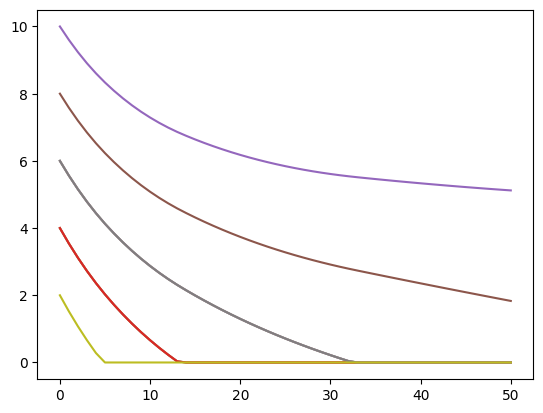

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [30]:
hn = Hamming_network()

W = np.array([[1, -1, -1, -1, -1, 1, 1], 
              [-1, 1, -1, -1, -1, 1, 1], 
              [-1, -1, 1, -1, -1, -1, 1], 
              [1, -1, 1, 1, -1, 1, 1], 
              [-1, -1, -1, -1, 1, -1, 1], 
              [1, -1, 1, -1 , 1, -1, -1],
              [1, -1, 1, -1 , 1, -1, 1],
              [1, 1, 1, -1 , 1, -1, -1],
              [1, 1, 1, -1 , 1, 1, 1]])

p = np.array([-1, -1, -1, 1, 1, -1, -1])
epsilon = 0.01

hn.train(W, p, itmax=50, eps=epsilon)
hn.plot_as()
